# A Guide to Creating a Successful Movie Studio 

### **Author**: Raymond Leong 

***

## Overview

#### In this analysis we find three main points
1. The highest return on investments depends on the genres: Drama, Comedy, Action and Adventure. The top 10 films of all time have genres attributed to specifically Action, Comedy and SciFi. Thus the proper recommendation is to pursue films with a combination of genres of Action, Adventure, Comedy, Drama and Scifi
2. Foreign markets are extremely worth investing in because they all top films that generate a positive ROI will always have foreign market involvement.
3. Vote counts determine the succeess of a movie (how manytimes they visited the box office), not the ratings themselves.

## Buisness problem 

#### There are many problems to tackle when creating a new studio for film production, for instance:
1. How does Microsoft generate revenue from films?
2. How do past trends from data help interpret the performance of a film in box office venue?
3. Do foreign market have a place in the target audience for the films? How does the analysis provide insight between domestic gross and foreign gross?

****

## Data Selection

#### We Begin by looking at the data provided and observing which charts are most important

In [1]:
#Lets import our standard packages with their respective parameters
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from pandasql import sqldf
from matplotlib.pyplot import figure
pd.set_option('display.float_format', '{:.2f}'.format)

#### Analyzing files with the proper imported parameters

In [2]:
BOM_intial = pd.read_csv("bom.movie_gross.csv.gz")
TMDB = pd.read_csv("tmdb.movies.csv.gz")
TN_moviebudgets = pd.read_csv("tn.movie_budgets.csv.gz")
RTreviews = pd.read_csv("rt.reviews.tsv.gz" , sep='\t', engine='python')
RTmovie_information = pd.read_csv("rt.movie_info.tsv.gz" , sep='\t', engine='python')

In [3]:
print(BOM_intial) #everything in this table is going to be used.

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV    415000000.00   
1                      Alice in Wonderland (2010)          BV    334200000.00   
2     Harry Potter and the Deathly Hallows Part 1          WB    296000000.00   
3                                       Inception          WB    292600000.00   
4                             Shrek Forever After        P/DW    238700000.00   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.         6200.00   
3383                  Edward II (2018 re-release)          FM         4800.00   
3384                                     El Pacto        Sony         2500.00   
3385                                     The Swan  Synergetic         2400.00   
3386                            An Actor Prepares       Grav.         1700.00   

     foreign_gross  year  


In [4]:
print(TMDB) #we see additional information from this website that gives rise to popularity and release date

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1       33.53   2010-11-19   
1                      

In [5]:
print(TN_moviebudgets) #this is an important file because it tells us the production budget

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [6]:
print(list(RTmovie_information.columns))#RT gives us another insight on genre by in addition it tells us the director's name along with writers, and ratings
RTmovie_information

['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
print(list(RTreviews.columns))#I dont see any useful data here except rating and "fresh or rotten" is not a good indicator of a movie's success.
RTreviews

['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


### 
We will exclude RT files due to the lack of a column to merge other datasets with
#### 
We will select the rest of the files for these reasons:
1. We select bom because it gives us the title of the movie along with the studio, we can also cross check it with “TN_movie_budgets” by merging. TN movie budgets is the only table that has information on the production cost.
2. Additionally we select TMDB based off it's "original language" column and it also has a popularity rating with vote_average and vote_count
3. We select the movie_basics and the review table from the IBDM data base because these are the only ones that give us genre.


****

## Data Cleaning (BOM)

In [8]:
BOM_intial #lets make sure we drop the we ensure that domestic and foreign gross are integers
#print(list(BOM_intial.columns)) #this allows us to check for white spaces, which dont exist

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [9]:
BOM_intial.info() # we see some adjustments need to be made and lets also make a column that is "total_gross"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
#we will need to fill in the NA values and then apply the pandas astype str and apply function to try and replace all decimal points to 0
BOM_intial["foreign_gross"] = BOM_intial["foreign_gross"].fillna(0)
BOM_intial["domestic_gross"] = BOM_intial["domestic_gross"].fillna(0)
BOM_intial["foreign_gross"]= BOM_intial["foreign_gross"].astype(str).apply(lambda x: x.replace('.0',''))
#reconverting back to a integer or float 
BOM_intial["foreign_gross"] = pd.to_numeric(BOM_intial["foreign_gross"], errors = 'coerce')
BOM_intial["foreign_gross"] = pd.to_numeric(BOM_intial["foreign_gross"], errors='coerce')
BOM_intial["domestic_gross"] = pd.to_numeric(BOM_intial["domestic_gross"], errors='coerce')
#creating a total gross column
BOM_intial["total_gross"] = BOM_intial["foreign_gross"] + BOM_intial["domestic_gross"]

In [11]:
#BOM_intial = BOM_intial.drop('year', axis=1 ) this was done already and thus shows the final column with all adjustments
BOM_prepared = BOM_intial #renaming to mark progresion of our methods 
BOM_prepared

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018,6200.00
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018,4800.00
3384,El Pacto,Sony,2500.00,0.00,2018,2500.00
3385,The Swan,Synergetic,2400.00,0.00,2018,2400.00


### Data Cleaning (TN_moviebudgets)

In [12]:
TN_moviebudgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
print(list(TN_moviebudgets.columns)) #this allows us to check for white space

['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


In [14]:
TN_moviebudgets.info() #  i can drop the id and release date columns, convert production, domestic and worldwide into integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
#cleaning the data by first dropping irrelevant columns
TN_moviebudgets = TN_moviebudgets.drop("id", axis=1)
TN_moviebudgets = TN_moviebudgets.drop("release_date", axis=1)

In [16]:
#using the same commands from BOM we take the pandas method and replace all $ signs and decimal places 
TN_moviebudgets["production_budget"]= TN_moviebudgets["production_budget"].astype(str).apply(lambda x: x.replace('$',''))
TN_moviebudgets["domestic_gross"] = TN_moviebudgets["domestic_gross"].astype(str).apply(lambda x: x.replace('$',''))
TN_moviebudgets["worldwide_gross"]= TN_moviebudgets["worldwide_gross"].astype(str).apply(lambda x: x.replace('$',''))
TN_moviebudgets["production_budget"]= TN_moviebudgets["production_budget"].astype(str).apply(lambda x: x.replace(',',''))
TN_moviebudgets["domestic_gross"] = TN_moviebudgets["domestic_gross"].astype(str).apply(lambda x: x.replace(',',''))
TN_moviebudgets["worldwide_gross"]= TN_moviebudgets["worldwide_gross"].astype(str).apply(lambda x: x.replace(',',''))

In [17]:
#Changing everything back into the numeric form 
TN_moviebudgets["production_budget"] = pd.to_numeric(TN_moviebudgets["production_budget"], errors='coerce')
TN_moviebudgets["domestic_gross"] = pd.to_numeric(TN_moviebudgets["domestic_gross"], errors='coerce')
TN_moviebudgets["worldwide_gross"] = pd.to_numeric(TN_moviebudgets["worldwide_gross"], errors='coerce')

In [18]:
#lets look at the average production_budget over these movies
#you want to find your ROI from here, youre not going to treat any anamolies because its the largest data base with the most amount of movies
TN_moviebudgets["ROI"]= TN_moviebudgets["worldwide_gross"] - TN_moviebudgets["production_budget"]

TN_moviebudgets.head(100)

,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,Avatar,425000000,760507625,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,Dark Phoenix,350000000,42762350,149762350,-200237650
3,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...
95,Captain Marvel,175000000,426525952,1123061550,948061550
96,The Jungle Book,175000000,364001123,962854547,787854547
97,Inside Out,175000000,356461711,854235992,679235992
98,Spider-Man: Homecoming,175000000,334201140,880166350,705166350


In [19]:
#Lets look at the distrubition of ROI and production budget

<AxesSubplot:xlabel='production_budget'>

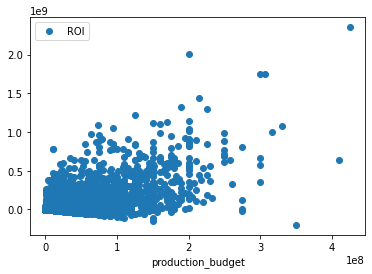

In [20]:
TN_moviebudgets.plot(x='production_budget', y='ROI', style='o')
#this graph is not useful for the presentation but we can clearly see that data is clearly scattered randomly in the ROI=< 1e9 

In [21]:
#Instead lets look at the describe function
TN_moviebudgets.describe()

,production_budget,domestic_gross,worldwide_gross,ROI
count,5782.00,5782.00,5782.00,5782.00
mean,31587757.10,41873326.87,91487460.91,59899703.81
std,41812076.83,68240597.36,174719968.78,146088881.08
min,1100.00,0.00,0.00,-200237650.00
25%,5000000.00,1429534.50,4125414.75,-2189070.75
50%,17000000.00,17225945.00,27984448.50,8550285.50
75%,40000000.00,52348661.50,97645836.50,60968501.75
max,425000000.00,936662225.00,2776345279.00,2351345279.00


In [22]:
#So this chart shows us that the minimum you want is to invest somwhere between 50th and 75th percentile
#in order to do that we want to look at TOP films (75%) 

In [23]:
#looking at the distrubition of ROIs in this category through percentiles in more detail

TN_moviebudgets['ROI'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])                    
#we see that an investment around 1116121.60 is almost the minimum required for a positive ROI statistically

0.00   -200237650.00
0.10    -11779672.50
0.20     -4222301.60
0.30      -982694.80
0.40      1116121.60
0.50      8550285.50
0.60     21417631.00
0.70     42927989.90
0.80     82955704.40
0.90    175978147.60
1.00   2351345279.00
Name: ROI, dtype: float64

#### Data Cleaning with TN_movie_budgets and BOM files to prepare for merge

In [24]:
#start by dropping duplicate entries 
BOM_prepared = BOM_prepared.drop_duplicates()
TN_moviebudgets= TN_moviebudgets.drop_duplicates()

In [25]:
# we know that we have to make the columns title in TN in order to merge the movies based off the strings
TN_moviebudgets = TN_moviebudgets.rename(columns={"movie": "title"})

In [26]:
#let's create a raw merge!
BOM_and_TN = pd.merge(BOM_prepared, TN_moviebudgets, on="title")
BOM_and_TN

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00,200000000,415004880,1068879522,868879522
1,Inception,WB,292600000.00,535700000.00,2010,828300000.00,160000000,292576195,835524642,675524642
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00,165000000,238736787,756244673,591244673
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,698500000.00,68000000,300531751,706102828,638102828
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,623900000.00,170000000,312433331,621156389,451156389
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.00,0.00,2018,4300000.00,10000000,4286367,6089100,-3910900
1243,Ben is Back,RAtt.,3700000.00,0.00,2018,3700000.00,13000000,3703182,9633111,-3366889
1244,Bilal: A New Breed of Hero,VE,491000.00,1700000.00,2018,2191000.00,30000000,490973,648599,-29351401
1245,Mandy,RLJ,1200000.00,0.00,2018,1200000.00,6000000,1214525,1427656,-4572344


#### Data Cleaning and Filter: IMDB

In [27]:
ConnectiontoDF = sqlite3.connect("im.db") 
cur = ConnectiontoDF.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names
#we know we want movie basics and movie ratings at the minimum, so lets get that information

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [28]:
#running a SQL command to retrieve the table movie basics
Whatisinhere1 = """
SELECT *
FROM movie_basics
;
"""

movie_basics_table = pd.read_sql(Whatisinhere1, ConnectiontoDF)
movie_basics_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [29]:
#running a SQL command to retrieve the table movie ratings and renaming the columns since they did not appear
Whatisinhere2 = """
SELECT *
FROM movie_ratings
;
"""
movie_ratings = pd.DataFrame(cur.execute(Whatisinhere2).fetchall())
movie_ratings= movie_ratings.rename(columns={0:"movie_id", 1:"average_rating", 2:"Number_of_votes"})

In [30]:
#merging the two tables based off the primrary key "movie_id"
IMDB_merge= pd.merge(movie_ratings, movie_basics_table, on= "movie_id")
print(list(IMDB_merge.columns))#looking at how to rename any column if necessary

['movie_id', 'average_rating', 'Number_of_votes', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']


In [31]:
IMDB_merge = IMDB_merge.sort_values(by=["start_year"])
#create the updated DB with sorted values by years as a test to see how well the merge went
IMDB_merge

,movie_id,average_rating,Number_of_votes,primary_title,original_title,start_year,runtime_minutes,genres
30220,tt1937455,5.50,25,Vroom,Vroom,2010,130.00,"Action,Comedy,Crime"
52704,tt1730714,7.10,1024,Rubble Kings,Rubble Kings,2010,71.00,"Biography,Documentary,History"
52701,tt1728242,6.10,29,Nika,Nika,2010,90.00,Drama
52700,tt1727354,7.60,12,Lumpinee,Lumpinee,2010,120.00,"Documentary,Drama,Sport"
52698,tt1725809,5.90,62,Close to You,Jin zai zhi chi,2010,103.00,"Drama,Romance,Sport"
...,...,...,...,...,...,...,...,...
45630,tt9646548,5.10,137,Açela,Açela,2019,nan,"Adventure,Animation,Comedy"
45631,tt9658140,6.00,11,The Last to See Them,Gli ultimi a vederli vivere,2019,79.00,Drama
45633,tt9663258,6.00,140,Trhlina,Trhlina,2019,111.00,"Mystery,Thriller"
45635,tt9740952,7.80,20,Master of Dark Shadows,Master of Dark Shadows,2019,92.00,"Biography,Documentary,History"


In [32]:
IMDB_merge.describe()
#hard to use this data without further cleaning 

,average_rating,Number_of_votes,start_year,runtime_minutes
count,73856.00,73856.00,73856.00,66236.00
mean,6.33,3523.66,2014.28,94.65
std,1.47,30294.02,2.61,208.57
min,1.00,5.00,2010.00,3.00
25%,5.50,14.00,2012.00,81.00
50%,6.50,49.00,2014.00,91.00
75%,7.40,282.00,2016.00,104.00
max,10.00,1841066.00,2019.00,51420.00


In [33]:
#turn start year as an object 
IMDB_merge["start_year"]= IMDB_merge["start_year"].astype(str)
#IMDB_merge.info()
#then fill in runtime minutes with the mean of the column values 
mean_value=IMDB_merge['runtime_minutes'].mean()
IMDB_merge['runtime_minutes'].fillna(value=mean_value, inplace=True)


In [34]:
IMDB_merge.describe()
#now these values are not the best since they include outliers so its important to select data after this cleaning 

,average_rating,Number_of_votes,runtime_minutes
count,73856.00,73856.00,73856.00
mean,6.33,3523.66,94.65
std,1.47,30294.02,197.52
min,1.00,5.00,3.00
25%,5.50,14.00,83.00
50%,6.50,49.00,93.00
75%,7.40,282.00,101.00
max,10.00,1841066.00,51420.00


#### Data Cleaning (End) Merging all tables represented

In [35]:
#switch the column name in our IMDB merge similar to the method for TN and BOM.
IMDB_merge = IMDB_merge.rename(columns={"primary_title":"title"})
#print(list(IMDB_merge.columns)) - this helps us find what we need 

In [36]:
#IMDB_merge_genres_exploded = IMDB_merge.drop('genres', axis=1).join(IMDB_merge['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
#IMDB_merge_genres_exploded

In [37]:
IMDB_BOM_TN_DRAFT= pd.merge(IMDB_merge, BOM_and_TN, on="title")
IMDB_BOM_TN_DRAFT 

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
0,tt1683003,7.80,94,The Tempest,The Tempest,2010,131.00,Drama,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,"Comedy,Drama,Fantasy",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
2,tt3840898,8.50,171,The Tempest,The Tempest,2014,169.00,"Comedy,Drama",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
3,tt1686470,6.30,50,Inferno,Giao lo dinh menh,2010,100.00,Thriller,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
4,tt3219106,6.30,183,Inferno,Inferno,2014,113.00,Drama,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,tt4477536,4.50,43893,Fifty Shades Freed,Fifty Shades Freed,2018,105.00,"Drama,Romance,Thriller",Uni.,100400000.00,271500000.00,2018,371900000.00,55000000,100407760,371350619,316350619
1409,tt4123430,6.60,163151,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.00,"Adventure,Family,Fantasy",WB,159600000.00,494100000.00,2018,653700000.00,200000000,159555901,652220086,452220086
1410,tt7349662,7.50,149005,BlacKkKlansman,BlacKkKlansman,2018,135.00,"Biography,Crime,Drama",Focus,49300000.00,44000000.00,2018,93300000.00,15000000,49275340,93017335,78017335
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,"Adventure,Animation,Comedy",LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110


##### this merge is useful when we are looking at values without duplicate row entries for each genre

In [38]:
#IMDB_BOM_TN_DRAFT.info() again, we are looking at the data types and finding all NAN counts

In [39]:
#our best solution is to drop it because the non-null count values are just a few shy from reaching the total amount of entries
IMDB_BOM_TN_DRAFT = IMDB_BOM_TN_DRAFT.dropna()
IMDB_BOM_TN_DRAFT 

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
0,tt1683003,7.80,94,The Tempest,The Tempest,2010,131.00,Drama,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,"Comedy,Drama,Fantasy",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
2,tt3840898,8.50,171,The Tempest,The Tempest,2014,169.00,"Comedy,Drama",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
3,tt1686470,6.30,50,Inferno,Giao lo dinh menh,2010,100.00,Thriller,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
4,tt3219106,6.30,183,Inferno,Inferno,2014,113.00,Drama,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,tt4477536,4.50,43893,Fifty Shades Freed,Fifty Shades Freed,2018,105.00,"Drama,Romance,Thriller",Uni.,100400000.00,271500000.00,2018,371900000.00,55000000,100407760,371350619,316350619
1409,tt4123430,6.60,163151,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.00,"Adventure,Family,Fantasy",WB,159600000.00,494100000.00,2018,653700000.00,200000000,159555901,652220086,452220086
1410,tt7349662,7.50,149005,BlacKkKlansman,BlacKkKlansman,2018,135.00,"Biography,Crime,Drama",Focus,49300000.00,44000000.00,2018,93300000.00,15000000,49275340,93017335,78017335
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,"Adventure,Animation,Comedy",LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110


In [40]:
#this method was used to create a second version of the graph with an stack function 
IMDB_merge_genres_exploded = IMDB_BOM_TN_DRAFT.drop('genres', axis=1).join(IMDB_BOM_TN_DRAFT['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
IMDB_merge_genres_exploded
#Matt Carr gave me the idea

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI,genres
0,tt1683003,7.80,94,The Tempest,The Tempest,2010,131.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Drama
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Comedy
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Drama
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Fantasy
2,tt3840898,8.50,171,The Tempest,The Tempest,2014,169.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110,Animation
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110,Comedy
1412,tt2704998,7.00,163279,Game Night,Game Night,2018,100.00,WB (NL),69200000.00,48500000.00,2018,117700000.00,37000000,69179066,117378084,80378084,Action
1412,tt2704998,7.00,163279,Game Night,Game Night,2018,100.00,WB (NL),69200000.00,48500000.00,2018,117700000.00,37000000,69179066,117378084,80378084,Comedy


## Data Analysis (Includes interpretations) and Data Visualization

In [41]:
#print(list(IMDB_BOM_TN_DRAFT.columns)) 
#creating this very simple list so I can drop anything in this master table 

In [42]:
#So we're going to firstlook at ROI 
IMDB_merge_genres_exploded.sort_values(by=['ROI'],  ascending=False)

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI,genres
1372,tt1825683,7.30,516148,Black Panther,Black Panther,2018,134.00,BV,700100000.00,646900000.00,2018,1347000000.00,200000000,700059566,1348258224,1148258224,Action
1372,tt1825683,7.30,516148,Black Panther,Black Panther,2018,134.00,BV,700100000.00,646900000.00,2018,1347000000.00,200000000,700059566,1348258224,1148258224,Sci-Fi
1372,tt1825683,7.30,516148,Black Panther,Black Panther,2018,134.00,BV,700100000.00,646900000.00,2018,1347000000.00,200000000,700059566,1348258224,1148258224,Adventure
1378,tt4881806,6.20,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000,417719760,1305772799,1135772799,Sci-Fi
1378,tt4881806,6.20,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000,417719760,1305772799,1135772799,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt1041804,4.30,3119,The Nutcracker in 3D,The Nutcracker in 3D,2010,110.00,Free,195000.00,16000000.00,2010,16195000.00,90000000,195459,20466016,-69533984,Family
127,tt1041804,4.30,3119,The Nutcracker in 3D,The Nutcracker in 3D,2010,110.00,Free,195000.00,16000000.00,2010,16195000.00,90000000,195459,20466016,-69533984,Action
477,tt1305591,5.40,19823,Mars Needs Moms,Mars Needs Moms,2011,88.00,BV,21400000.00,17600000.00,2011,39000000.00,150000000,21392758,39549758,-110450242,Animation
477,tt1305591,5.40,19823,Mars Needs Moms,Mars Needs Moms,2011,88.00,BV,21400000.00,17600000.00,2011,39000000.00,150000000,21392758,39549758,-110450242,Adventure


In [43]:
# we see that we have all the variables we need to manipulate this data based off of prior .describe() to find means etc
# IMDB_merge_genres_exploded.to_csv('Finalchartsavedjustincase.csv', index=False) lets save the file just incase

In [44]:
IMDB_BOM_TN_DRAFT.sort_values(by=['ROI'],  ascending=False)

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
1372,tt1825683,7.30,516148,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",BV,700100000.00,646900000.00,2018,1347000000.00,200000000,700059566,1348258224,1148258224
1378,tt4881806,6.20,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000,417719760,1305772799,1135772799
25,tt1611845,5.40,75,Frozen,Wai nei chung ching,2010,92.00,"Fantasy,Romance",BV,400700000.00,875700000.00,2013,1276400000.00,150000000,400738009,1272469910,1122469910
24,tt1323045,6.20,62311,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",BV,400700000.00,875700000.00,2013,1276400000.00,150000000,400738009,1272469910,1122469910
26,tt2294629,7.50,516998,Frozen,Frozen,2013,102.00,"Adventure,Animation,Comedy",BV,400700000.00,875700000.00,2013,1276400000.00,150000000,400738009,1272469910,1122469910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,tt2717822,5.40,48427,Blackhat,Blackhat,2015,133.00,"Action,Crime,Thriller",Uni.,8000000.00,11600000.00,2015,19600000.00,70000000,8005980,19665004,-50334996
768,tt0790736,5.60,109078,R.I.P.D.,R.I.P.D.,2013,96.00,"Action,Adventure,Comedy",Uni.,33600000.00,44700000.00,2013,78300000.00,130000000,33618855,79076678,-50923322
1252,tt3095734,5.70,13525,Monster Trucks,Monster Trucks,2016,104.00,"Action,Adventure,Comedy",Par.,33400000.00,31100000.00,2017,64500000.00,125000000,33370166,61642798,-63357202
127,tt1041804,4.30,3119,The Nutcracker in 3D,The Nutcracker in 3D,2010,110.00,"Action,Family,Fantasy",Free,195000.00,16000000.00,2010,16195000.00,90000000,195459,20466016,-69533984


In [45]:
#MDB_merge_genres_exploded 
#print(list(IMDB_merge_genres_exploded.columns)) #creating the same list

### Creating our graph and finding the most produced films

Text(0, 0.5, 'Amount of films produced')

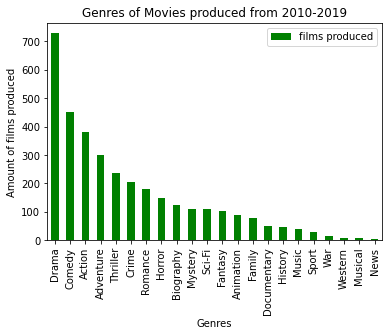

In [46]:
d = IMDB_merge_genres_exploded.groupby(["genres"]).count()
d = d.drop(columns=['movie_id', 'Number_of_votes', 'title', 'original_title', 'start_year', 'runtime_minutes', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'total_gross', 'production_budget', 'domestic_gross_y', 'worldwide_gross', 'ROI'])
d = d.rename(columns={"average_rating": "films produced"})
d.drop_duplicates()
d = d.sort_values(by= ["films produced"], ascending = False)
ax = d.plot.bar(color = "green")
plt.title('Genres of Movies produced from 2010-2019')
plt.xlabel('Genres')
plt.ylabel('Amount of films produced')


In [47]:
d
# sorted by ROI we can see that 
    #dramas, comedy, action, adventure, thriller are all films that were mass produced and are good places to start


,films produced
genres,
Drama,730
Comedy,451
Action,380
Adventure,301
Thriller,238
Crime,203
Romance,179
Horror,148
Biography,125


In [48]:
IMDB_merge_genres_exploded

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI,genres
0,tt1683003,7.80,94,The Tempest,The Tempest,2010,131.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Drama
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Comedy
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Drama
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Fantasy
2,tt3840898,8.50,171,The Tempest,The Tempest,2014,169.00,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110,Animation
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110,Comedy
1412,tt2704998,7.00,163279,Game Night,Game Night,2018,100.00,WB (NL),69200000.00,48500000.00,2018,117700000.00,37000000,69179066,117378084,80378084,Action
1412,tt2704998,7.00,163279,Game Night,Game Night,2018,100.00,WB (NL),69200000.00,48500000.00,2018,117700000.00,37000000,69179066,117378084,80378084,Comedy


### Creating our ROI and worldwide gross Graph

In [49]:
IMDB_BOM_TN_ascending = IMDB_BOM_TN_DRAFT.sort_values(by= ["ROI"], ascending=False)

In [50]:
IMDB_BOM_TN_ascending.sort_values(by=["Number_of_votes"], ascending=False ) 
df = IMDB_BOM_TN_ascending[(IMDB_BOM_TN_ascending.ROI >= 0) & (IMDB_BOM_TN_ascending.year >= 2018)].sort_values(by=['ROI'], ascending=False)
df = df.head(10)

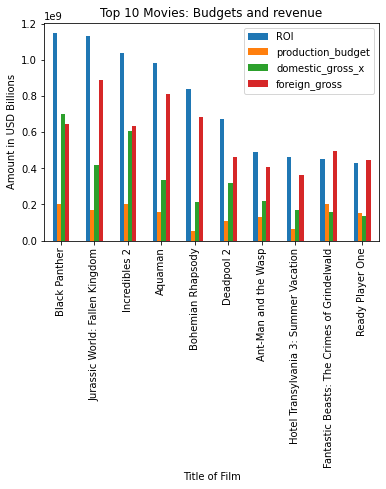

In [51]:
df.plot(x='title', y=['ROI', 'production_budget', "domestic_gross_x", "foreign_gross"], kind='bar') 

plt.title('Top 10 Movies: Budgets and revenue')
plt.xlabel('Title of Film')
plt.ylabel('Amount in USD Billions')
plt.show()

In [52]:
df.describe() #now this data is most optimal because we want to create a top 10 film!
#the average run time is 131 minutes with a std deviation of 15 minutes.
#A production budget in this example shows that 155000000 will yield an ROI 913439991.00

,average_rating,Number_of_votes,runtime_minutes,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,7.16,269044.60,126.50,327780000.00,583970000.00,2018.00,911750000.00,144000000.00,328371285.60,910684711.70,766684711.70
std,0.63,130422.18,13.73,194530333.54,178928701.19,0.00,322454834.91,53634565.97,194505324.32,322414010.85,298181025.69
min,6.20,42299.00,97.00,137700000.00,361100000.00,2018.00,528600000.00,55000000.00,137690172.00,527079962.00,429290136.00
25%,6.72,207413.75,118.25,179725000.00,449025000.00,2018.00,630375000.00,115000000.00,179700903.75,630413516.50,469846136.50
50%,7.20,253676.00,131.00,267550000.00,564150000.00,2018.00,841300000.00,155000000.00,270620237.50,840832949.50,758332949.50
75%,7.65,334514.50,134.00,397050000.00,677125000.00,2018.00,1219050000.00,192500000.00,397055271.75,1218614193.25,1028614193.25
max,8.00,516148.00,143.00,700100000.00,891800000.00,2018.00,1347000000.00,200000000.00,700059566.00,1348258224.00,1148258224.00


In [53]:
#taking the top 10 films and looking at how their genres are distrubuted  
df_exploded = df.drop('genres', axis=1).join(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_exploded

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI,genres
1345,tt1727824,8.00,345466,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.00,Fox,216400000.00,687200000.00,2018,903600000.00,55000000,216303339,894985342,839985342,Biography
1345,tt1727824,8.00,345466,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.00,Fox,216400000.00,687200000.00,2018,903600000.00,55000000,216303339,894985342,839985342,Drama
1345,tt1727824,8.00,345466,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.00,Fox,216400000.00,687200000.00,2018,903600000.00,55000000,216303339,894985342,839985342,Music
1346,tt5220122,6.30,42299,Hotel Transylvania 3: Summer Vacation,Hotel Transylvania 3: Summer Vacation,2018,97.00,Sony,167500000.00,361100000.00,2018,528600000.00,65000000,167500092,527079962,462079962,Adventure
1346,tt5220122,6.30,42299,Hotel Transylvania 3: Summer Vacation,Hotel Transylvania 3: Summer Vacation,2018,97.00,Sony,167500000.00,361100000.00,2018,528600000.00,65000000,167500092,527079962,462079962,Animation
1346,tt5220122,6.30,42299,Hotel Transylvania 3: Summer Vacation,Hotel Transylvania 3: Summer Vacation,2018,97.00,Sony,167500000.00,361100000.00,2018,528600000.00,65000000,167500092,527079962,462079962,Comedy
1351,tt1477834,7.10,263328,Aquaman,Aquaman,2018,143.00,WB,335100000.00,812700000.00,2018,1147800000.00,160000000,335061807,1146894640,986894640,Action
1351,tt1477834,7.10,263328,Aquaman,Aquaman,2018,143.00,WB,335100000.00,812700000.00,2018,1147800000.00,160000000,335061807,1146894640,986894640,Adventure
1351,tt1477834,7.10,263328,Aquaman,Aquaman,2018,143.00,WB,335100000.00,812700000.00,2018,1147800000.00,160000000,335061807,1146894640,986894640,Fantasy
1360,tt3606756,7.70,203510,Incredibles 2,Incredibles 2,2018,118.00,BV,608600000.00,634200000.00,2018,1242800000.00,200000000,608581744,1242520711,1042520711,Action


#### Top 10 films genre distribution

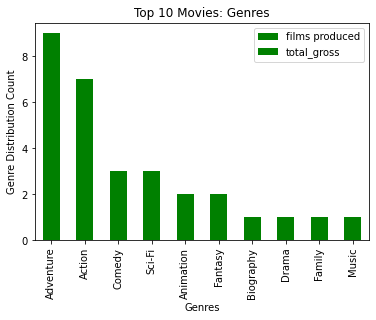

In [54]:
#code is the same as the previous used to look at ROI 
e = df_exploded.groupby(["genres"]).count()
e = e.drop(columns=['movie_id', 'Number_of_votes', 'title', 'original_title', 'start_year', 'runtime_minutes', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'production_budget', 'domestic_gross_y', 'worldwide_gross', 'ROI'])
e = e.rename(columns={"average_rating": "films produced"})
e.drop_duplicates()
e = e.sort_values(by= ["films produced"], ascending = False)
ax = e.plot.bar(color = "green")
plt.title('Top 10 Movies: Genres')
plt.xlabel('Genres')
plt.ylabel('Genre Distribution Count')
plt.show()

### Finding the relatable variables to ROI 

In [55]:
IMDB_BOM_TN_DRAFT

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
0,tt1683003,7.80,94,The Tempest,The Tempest,2010,131.00,Drama,Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
1,tt1274300,5.40,7073,The Tempest,The Tempest,2010,110.00,"Comedy,Drama,Fantasy",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
2,tt3840898,8.50,171,The Tempest,The Tempest,2014,169.00,"Comedy,Drama",Mira.,278000.00,68700.00,2010,346700.00,20000000,277943,277943,-19722057
3,tt1686470,6.30,50,Inferno,Giao lo dinh menh,2010,100.00,Thriller,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
4,tt3219106,6.30,183,Inferno,Inferno,2014,113.00,Drama,Sony,34300000.00,185700000.00,2016,220000000.00,75000000,34343574,219519367,144519367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,tt4477536,4.50,43893,Fifty Shades Freed,Fifty Shades Freed,2018,105.00,"Drama,Romance,Thriller",Uni.,100400000.00,271500000.00,2018,371900000.00,55000000,100407760,371350619,316350619
1409,tt4123430,6.60,163151,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.00,"Adventure,Family,Fantasy",WB,159600000.00,494100000.00,2018,653700000.00,200000000,159555901,652220086,452220086
1410,tt7349662,7.50,149005,BlacKkKlansman,BlacKkKlansman,2018,135.00,"Biography,Crime,Drama",Focus,49300000.00,44000000.00,2018,93300000.00,15000000,49275340,93017335,78017335
1411,tt4701724,6.10,15882,Early Man,Early Man,2018,89.00,"Adventure,Animation,Comedy",LGF,8300000.00,46400000.00,2018,54700000.00,50000000,8267544,45285890,-4714110


In [56]:
IMDB_BOM_TN_DRAFT.describe()#lets look at the top number of votes

,average_rating,Number_of_votes,runtime_minutes,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
count,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00,1402.00
mean,6.43,113014.23,106.97,59082370.96,87230027.24,2013.73,146312398.20,45609607.37,58957611.56,146270414.23,100660806.86
std,1.03,163352.73,19.56,81074005.55,147160863.21,2.53,220640688.10,54171936.93,81103492.45,219517093.29,180967580.75
min,1.60,5.00,3.00,0.00,0.00,2010.00,1200.00,50000.00,0.00,0.00,-110450242.00
25%,5.90,13112.00,94.65,6900000.00,4300000.00,2011.00,14400000.00,10000000.00,6873095.75,17411830.25,1495262.00
50%,6.50,59111.50,105.00,33400000.00,26150000.00,2014.00,63550000.00,25000000.00,32604656.50,64724157.00,30803847.50
75%,7.10,137522.75,118.00,73100000.00,93600000.00,2016.00,172250000.00,56800000.00,73864507.00,170118075.75,117871887.50
max,9.20,1841066.00,192.00,700100000.00,946400000.00,2018.00,1405400000.00,410600000.00,700059566.00,1403013963.00,1148258224.00


In [57]:
#Making a new chart extracting rows where we are only looking at the number of votes greater than the mean and the most recent films since 2016


IMDB_BOM_TN_ascending.sort_values(by=["Number_of_votes"], ascending=False ) 
dfz = IMDB_BOM_TN_ascending[(IMDB_BOM_TN_ascending.Number_of_votes >= 137522) & (IMDB_BOM_TN_ascending.year >= 2016)].sort_values(by=['ROI'], ascending=False)
dfz

,movie_id,average_rating,Number_of_votes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,total_gross,production_budget,domestic_gross_y,worldwide_gross,ROI
1372,tt1825683,7.30,516148,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",BV,700100000.00,646900000.00,2018,1347000000.00,200000000,700059566,1348258224,1148258224
1378,tt4881806,6.20,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000,417719760,1305772799,1135772799
1360,tt3606756,7.70,203510,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",BV,608600000.00,634200000.00,2018,1242800000.00,200000000,608581744,1242520711,1042520711
1351,tt1477834,7.10,263328,Aquaman,Aquaman,2018,143.00,"Action,Adventure,Fantasy",WB,335100000.00,812700000.00,2018,1147800000.00,160000000,335061807,1146894640,986894640
1168,tt3498820,7.80,583507,Captain America: Civil War,Captain America: Civil War,2016,147.00,"Action,Adventure,Sci-Fi",BV,408100000.00,745200000.00,2016,1153300000.00,250000000,408084349,1140069413,890069413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,tt2239822,6.50,139792,Valerian and the City of a Thousand Planets,Valerian and the City of a Thousand Planets,2017,137.00,"Action,Adventure,Fantasy",STX,41200000.00,184700000.00,2017,225900000.00,180000000,40479370,215098356,35098356
1163,tt2582782,7.60,176469,Hell or High Water,Hell or High Water,2016,102.00,"Action,Crime,Drama",LGF,27000000.00,10900000.00,2016,37900000.00,12000000,27007844,37584304,25584304
1250,tt4550098,7.50,205240,Nocturnal Animals,Nocturnal Animals,2016,116.00,"Drama,Thriller",Focus,10700000.00,19600000.00,2016,30300000.00,22500000,10663357,32398681,9898681
1125,tt3799694,7.40,240337,The Nice Guys,The Nice Guys,2016,116.00,"Action,Comedy,Crime",WB,36300000.00,26500000.00,2016,62800000.00,50000000,36261763,59596747,9596747


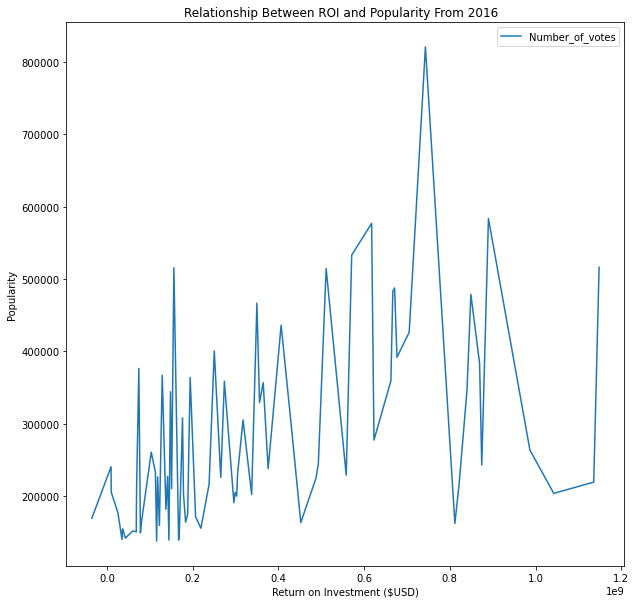

In [58]:
dfz.plot(x="ROI", y=["Number_of_votes"],
    kind="line", figsize=(10,10))
plt.title('Relationship Between ROI and Popularity From 2016  ')
plt.xlabel('Return on Investment ($USD)')
plt.ylabel('Popularity')
plt.show()
#this shows us that from .4-.8 e9 there is a positive correlation of the peaks

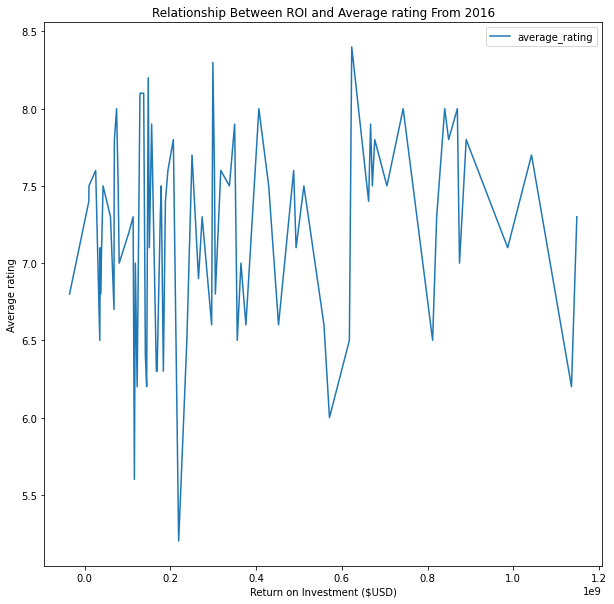

In [59]:
dfz.plot(x="ROI", y=["average_rating"],
    kind="line", figsize=(10,10))
plt.title('Relationship Between ROI and Average rating From 2016')
plt.xlabel('Return on Investment ($USD)')
plt.ylabel('Average rating')
plt.show()
#we dont see peaks and troughs reflecting a correlation- infact it tells us to avoid average rating as a indicator of optimal ROI

## Conclusion
****

#### Popularity is a very strong factor in determining a film's success

#### The foreign market provides a substantial amount of revenue for movies

#### Genres such as Action, adventure and comedy are most prominent and most successful in the box office